一键基线统计

本模块功能来自开源代码修改，遵循MIT开源协议，版权声明和许可声明已经包含在源代码文件夹内。

In [2]:
# Import numerical libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pixelmed_calc.medical_imaging.tableone import TableOne
from pixelmed_calc.medical_imaging.RadiologyComponents.solution import convert_chinese_columns_to_numeric
%matplotlib inline



导入数据，csv格式

In [5]:

import pandas as pd
#data = load_dataset('pn2012')
data = pd.read_csv('convert_chinese_columns_to_numeric.csv')
## 如果有不需要的列，可以指定排除['ID','No','surgery_number','surgery_numbernii']
#data=data[data['group']=='test']
data=data.drop(['ID','姓名','group'],axis=1)
display(data.columns)

Index(['label', '年龄', 'ER', 'PR', 'HER-2', '核级别', '肿块最长径（mm）', '部位', '是否溢液',
       '触及肿块', '钙化', '坏死'],
      dtype='object')

In [6]:

# columns to summarize
columns = ['label', '年龄', 'ER', 'PR', 'HER-2', '核级别', '肿块最长径（mm）', '部位', '是否溢液',
       '触及肿块', '钙化', '坏死']

# columns containing categorical variables
categorical = ['ER', 'PR', 'HER-2', '核级别', '部位', '是否溢液',
       '触及肿块', '钙化', '坏死']

# columns containing categorical variables
continuous = ['年龄', '肿块最长径（mm）']


In [7]:
# 转换数值
data = convert_chinese_columns_to_numeric(data, categorical)
data

Column: ER
0 -> 0
1 -> 1
Column: PR
0 -> 0
1 -> 1
Column: HER-2
0 -> 0
1 -> 1
2 -> 2
Column: 核级别
0 -> 0
1 -> 1
2 -> 2
Column: 部位
0 -> 0
1 -> 1
Column: 是否溢液
0 -> 0
1 -> 1
2 -> 2
Column: 触及肿块
0 -> 0
1 -> 1
Column: 钙化
0 -> 0
1 -> 1
2 -> 2
Column: 坏死
0 -> 0
1 -> 1


,label,年龄,ER,PR,HER-2,核级别,肿块最长径（mm）,部位,是否溢液,触及肿块,钙化,坏死
0,0,46,0,0,0,0,16.1,0,0,0,0,0
1,0,66,1,1,1,0,16.5,1,0,1,1,1
2,0,69,1,1,0,0,11.2,1,0,1,1,1
3,0,44,0,0,1,1,40.0,0,0,1,0,1
4,0,56,1,0,0,0,70.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
384,0,41,0,0,1,0,19.1,1,1,1,0,0
385,0,40,0,0,1,0,37.3,0,0,0,0,1
386,0,68,0,0,2,2,30.0,1,0,0,2,1
387,1,33,1,1,1,0,44.3,0,0,0,0,1


## Example 1: Simple summary of data with Table 1 <a name="simple-example"></a>

In this example we provide summary statistics across all of the data.

In [8]:
# View Table 1 (note the remarks below the table)

table1 = TableOne(data, dip_test=True, normal_test=True, tukey_test=True)
table1

,,Missing,Overall
n,,,389
"label, mean (SD)",,0,0.3 (0.5)
"年龄, mean (SD)",,0,51.3 (10.4)
"ER, mean (SD)",,0,0.3 (0.5)
"PR, mean (SD)",,0,0.4 (0.5)
"HER-2, mean (SD)",,0,0.7 (0.7)
"核级别, mean (SD)",,0,0.6 (0.7)
"肿块最长径（mm）, mean (SD)",,0,27.6 (17.3)
"部位, mean (SD)",,0,0.5 (0.5)
"是否溢液, mean (SD)",,0,0.1 (0.3)


## Exploring the warning raised by Hartigan's Dip Test

Hartigan's Dip Test is a test for multimodality. The test has suggested that the `Age`, `SysABP`, and `Height` distributions may be multimodal. We'll plot the distributions here.

(-10.0, 10.0)

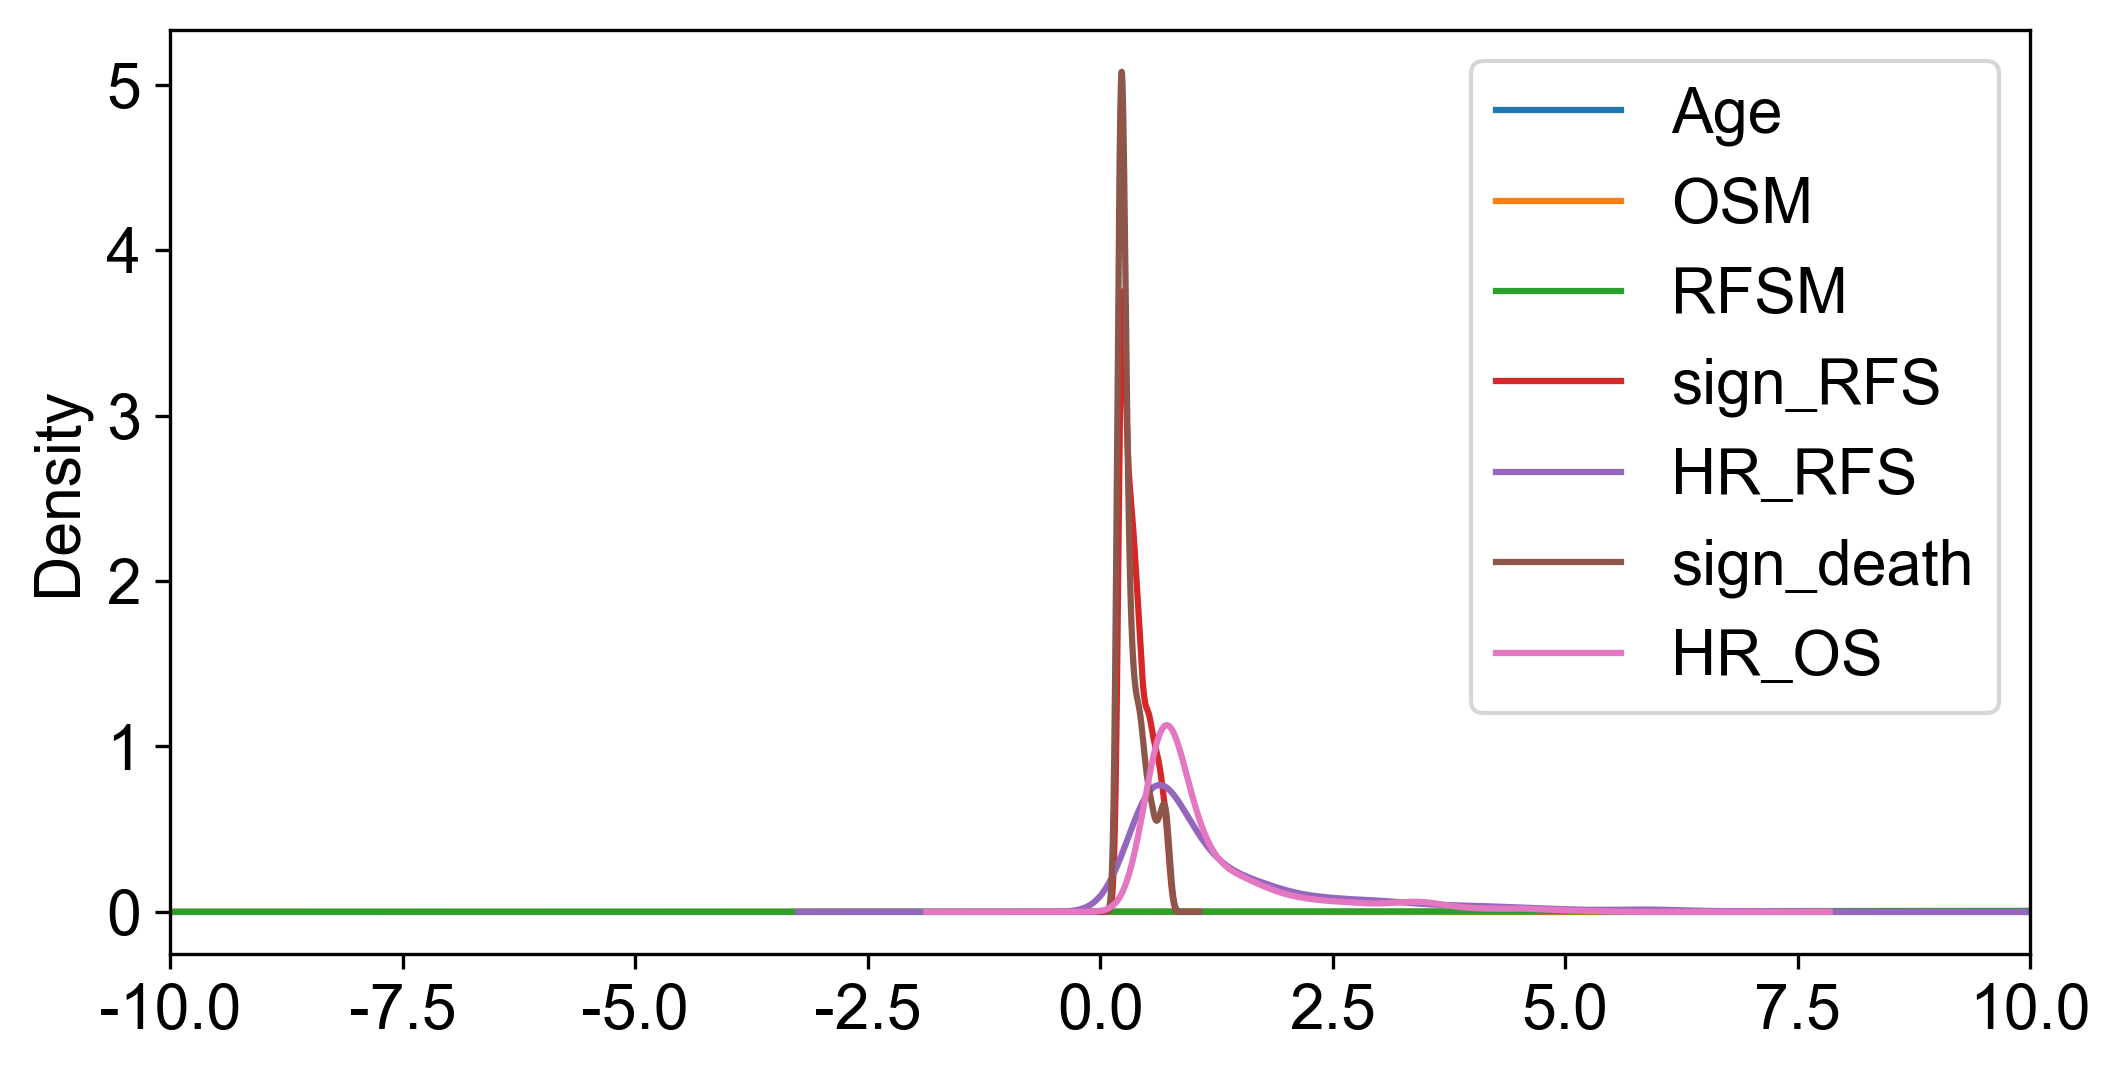

In [19]:
data[['Age', 'OSM', 'RFSM', 'sign_RFS', 'HR_RFS', 'sign_death', 'HR_OS']].dropna().plot.kde(figsize=[8,4])
plt.legend(['Age', 'OSM', 'RFSM', 'sign_RFS', 'HR_RFS', 'sign_death', 'HR_OS'])
plt.xlim([-10,10])

## Exploring the warning raised by Tukey's rule

Tukey's rule has found far outliers in Height, so we'll look at this in a boxplot

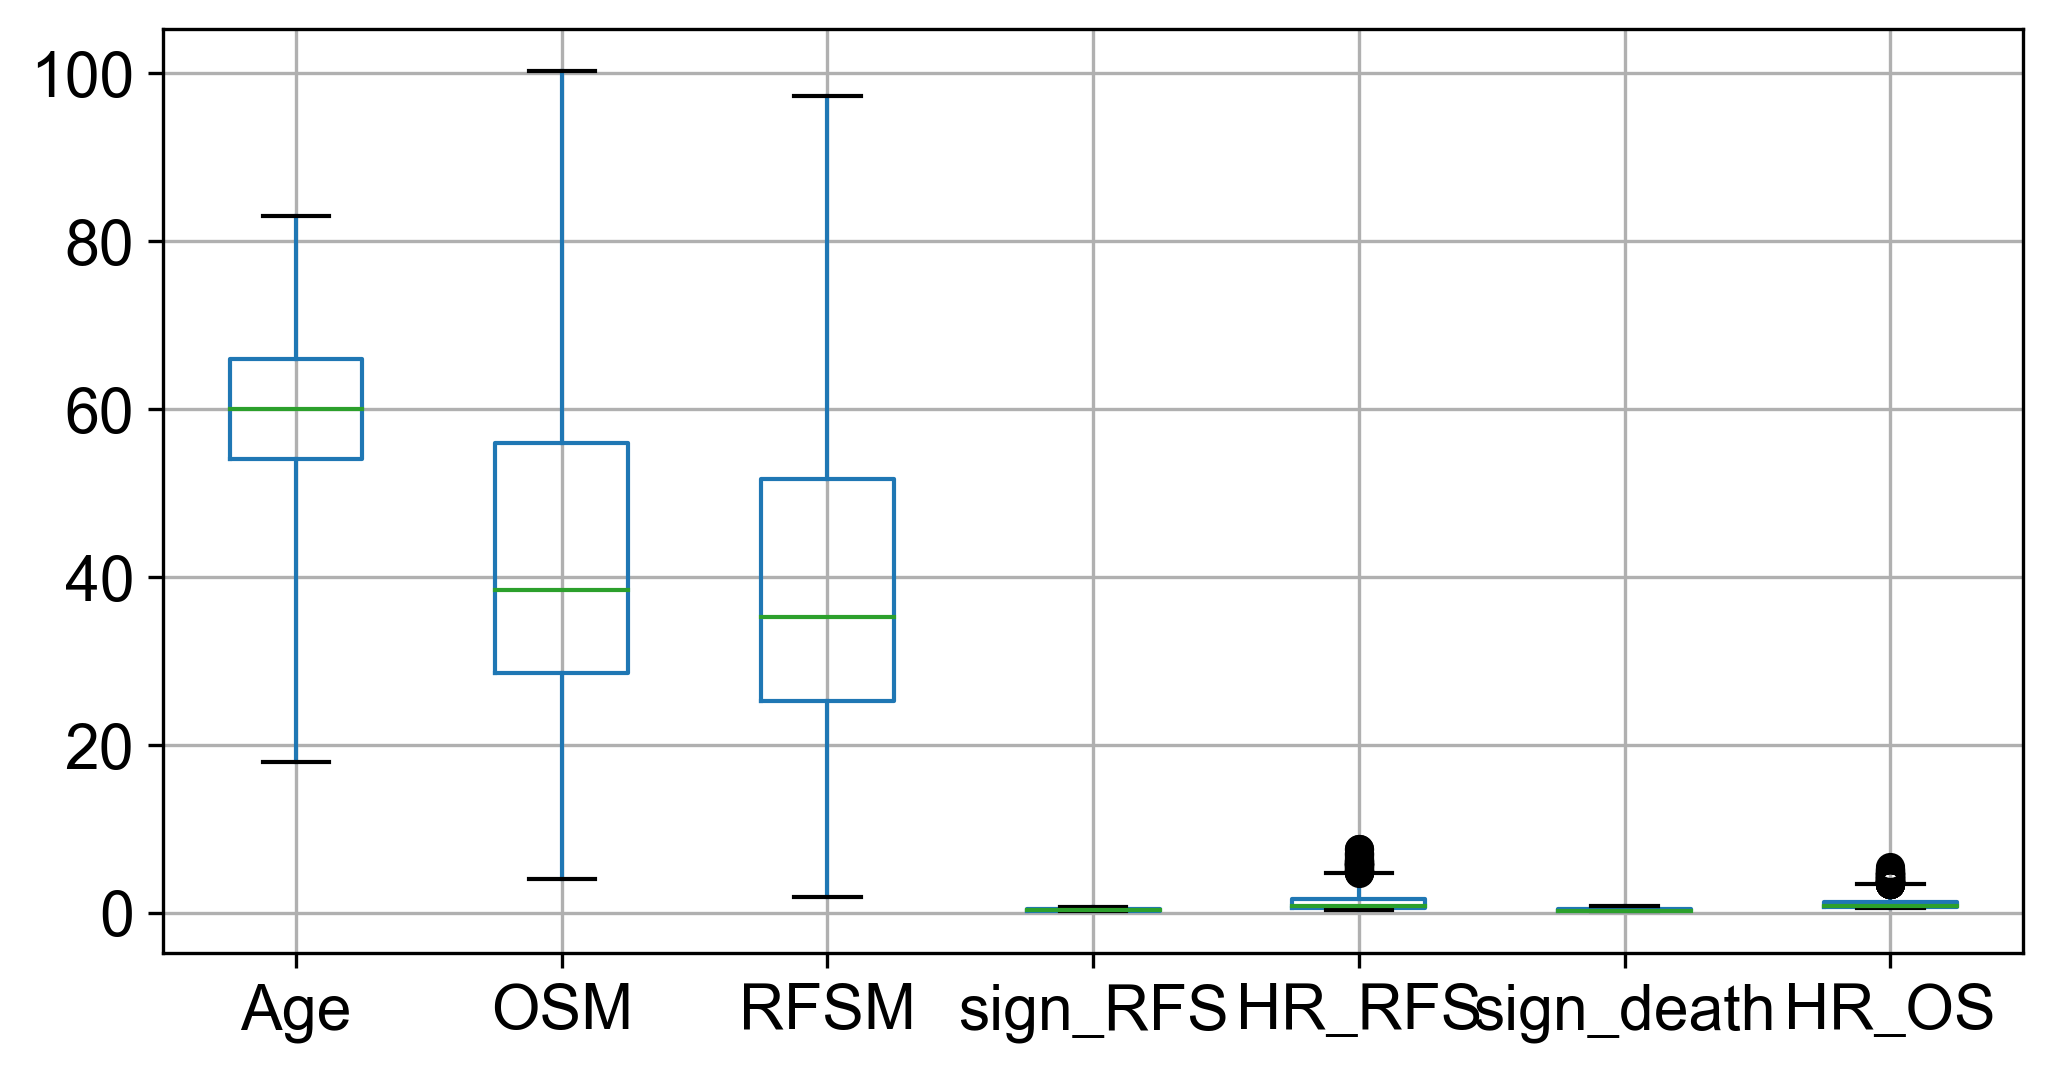

In [20]:
data[['Age', 'OSM', 'RFSM', 'sign_RFS', 'HR_RFS', 'sign_death', 'HR_OS']].boxplot(whis=3, figsize=[8,4])
plt.show()

## Example 2: Table 1 with stratification <a name="stratified-example"></a>

In this example we provide summary statistics across all of the data, specifying columns, categorical variables, and non-normal variables.

In [9]:

# non-normal variables
nonnormal = ['年龄', 'ER', 'PR', 'HER-2', '核级别', '肿块最长径（mm）', '部位', '是否溢液',
       '触及肿块', '钙化', '坏死']


# limit the binary variable "death" to a single row
limit = {"label": 1}

# set the order of the categorical variables
order = {}
#"ICU": ["MICU", "SICU", "CSRU", "CCU"]
# alternative labels
labels={'label': 'Mortality'}

# set decimal places for age to 0
decimals = {"年龄": 0}

# optionally, a categorical variable for stratification
groupby = 'label'

# rename the death column
labels={'label': 'Mortality'}

# display minimum and maximum for listed variables
min_max = []

table2 = TableOne(data, columns=columns, categorical=categorical, continuous=continuous,
                  groupby=groupby, nonnormal=nonnormal, rename=labels, label_suffix=True,
                  decimals=decimals, limit=limit, min_max=min_max,
                  dip_test=True, normal_test=True, tukey_test=True)

table2

Grouped by Mortality                                                      
                                         Missing           Overall                 0                 1
n                                                              389               261               128
年龄, median [Q1,Q3]                             0        50 [45,58]        51 [46,59]        48 [43,54]
ER, median [Q1,Q3]        0                             254 (65.3)        195 (74.7)         59 (46.1)
                          1                             135 (34.7)         66 (25.3)         69 (53.9)
PR, median [Q1,Q3]        0                             246 (63.2)        191 (73.2)         55 (43.0)
                          1                             143 (36.8)         70 (26.8)         73 (57.0)
HER-2, median [Q1,Q3]     0                             153 (39.3)         76 (29.1)         77 (60.2)
                          1                             188 (48.3)        152 (58.2)         36 (28.1)
                          2                              48 (12.3)         33 (12.6)         15 (11.7)
核级别, median [Q1,Q3]       0                             211 (54.2)        109 (41.8)        102 (79.7)
                          1                             115 (29.6)         91 (34.9)         24 (18.8)
                          2                              63 (16.2)         61 (23.4)           2 (1.6)
肿块最长径（mm）, median [Q1,Q3]                      0  20.0 [15.0,39.5]  19.2 [13.2,33.4]  26.9 [19.7,45.1]
部位, median [Q1,Q3]        0                             210 (54.0)        142 (54.4)         68 (53.1)
                          1                             179 (46.0)        119 (45.6)         60 (46.9)
是否溢液, median [Q1,Q3]      0                             344 (88.4)        236 (90.4)        108 (84.4)
                          1                              44 (11.3)          25 (9.6)         19 (14.8)
                          2                                1 (0.3)                             1 (0.8)
触及肿块, median [Q1,Q3]      0                             163 (41.9)         88 (33.7)         75 (58.6)
                          1                             226 (58.1)        173 (66.3)         53 (41.4)
钙化, median [Q1,Q3]        0                             143 (36.8)         88 (33.7)         55 (43.0)
                          1                             109 (28.0)         75 (28.7)         34 (26.6)
                          2                             137 (35.2)         98 (37.5)         39 (30.5)
坏死, median [Q1,Q3]        0                             139 (35.7)         82 (31.4)         57 (44.5)
                          1                             250 (64.3)        179 (68.6)         71 (55.5)
[1] Normality test reports non-normal
                                    distributions for: 年龄, 肿块最长径（mm）.

**Summary of the table**:

- variables are explicitly defined in the input arguments.
- the variables are displayed in the same order as the `columns` argument.
- the `limit` argument specifies that only a 1 value should be shown for death.
- the order of categorical values is defined in the optional `order` argument.
- `nonnormal` continuous variables are summarized by '`median [Q1,Q3]`' instead of `mean (SD)`.
- 'sex' is shown as 'gender and 'trt' is shown as 'treatment', as specified in the `rename` argument.
- data is summarized across the groups specified in the `groupby` argument.
- `min_max` displays \[minimum, maximum\] for the variable, instead of standard deviation or upper/lower quartiles.

## Adding p-values and standardized mean differences <a name="pval-smd"></a>

- We can run a test to compute p values by setting the ``pval`` argument to True. 
- Pairwise standardized mean differences can be added with the ``smd`` argument.

In [10]:
# create grouped_table with p values
table3 = TableOne(data, columns, categorical, continuous, groupby, nonnormal, pval = True, smd=True,
                  htest_name=True, dip_test=True, normal_test=True, tukey_test=True)

In [11]:
# view first 10 rows of tableone
table3

Grouped by label                                                                                                                              
                                     Missing           Overall                 0                 1 SMD (0,1)  test_stat P-Value                                       Test
n                                                          389               261               128                                                                        
年龄, median [Q1,Q3]                         0  50.0 [45.0,58.0]  51.0 [46.0,59.0]  48.5 [43.0,54.2]    -0.435  11.636596   0.001                             Kruskal-Wallis
ER, median [Q1,Q3]        0                         254 (65.3)        195 (74.7)         59 (46.1)     0.612  29.791085  <0.001                                Chi-squared
                          1                         135 (34.7)         66 (25.3)         69 (53.9)            29.791085                                                   
PR, median [Q1,Q3]        0                         246 (63.2)        191 (73.2)         55 (43.0)     0.643  32.431479  <0.001                                Chi-squared
                          1                         143 (36.8)         70 (26.8)         73 (57.0)            32.431479                                                   
HER-2, median [Q1,Q3]     0                         153 (39.3)         76 (29.1)         77 (60.2)     0.691  37.207442  <0.001                                Chi-squared
                          1                         188 (48.3)        152 (58.2)         36 (28.1)            37.207442                                                   
                          2                          48 (12.3)         33 (12.6)         15 (11.7)            37.207442                                                   
核级别, median [Q1,Q3]       0                         211 (54.2)        109 (41.8)        102 (79.7)     0.933  55.540499  <0.001                                Chi-squared
                          1                         115 (29.6)         91 (34.9)         24 (18.8)            55.540499                                                   
                          2                          63 (16.2)         61 (23.4)           2 (1.6)            55.540499                                                   
肿块最长径（mm）, median [Q1,Q3]                  0  20.0 [15.0,39.5]  19.2 [13.2,33.4]  26.9 [19.7,45.1]     0.549  29.380528  <0.001                             Kruskal-Wallis
部位, median [Q1,Q3]        0                         210 (54.0)        142 (54.4)         68 (53.1)     0.026   0.016889   0.897                                Chi-squared
                          1                         179 (46.0)        119 (45.6)         60 (46.9)             0.016889                                                   
是否溢液, median [Q1,Q3]      0                         344 (88.4)        236 (90.4)        108 (84.4)       nan   4.499002   0.105  Chi-squared (warning: expected count < 5)
                          1                          44 (11.3)          25 (9.6)         19 (14.8)             4.499002                                                   
                          2                            1 (0.3)                             1 (0.8)             4.499002                                                   
触及肿块, median [Q1,Q3]      0                         163 (41.9)         88 (33.7)         75 (58.6)     0.515  20.822874  <0.001                                Chi-squared
                          1                         226 (58.1)        173 (66.3)         53 (41.4)            20.822874                                                   
钙化, median [Q1,Q3]        0                         143 (36.8)         88 (33.7)         55 (43.0)     0.198   3.366714   0.186                                Chi-squared
                          1                         109 (28.0)         75 (28.7)         34 (26

**Summary of the table**:
- the `htest_name` argument can be used to display the name of the hypothesis tests used.
- the '`p-value`' column displays the p value generated to 3 decimal places.

## Using a custom hypothesis test to compute P-Values <a name="custom-htest"></a>

Custom hypothesis tests can be defined using the `htest` argument, which takes a dictionary of variable: function pairs (i.e. `htest = {var: custom_func}`, where `var` is the variable and `custom_func` is a function that takes lists of values in each group. The custom function must return a single `pval` value.

In [13]:
# define the custom tests
# `*` allows the function to take an unknown number of arguments
def my_custom_test(group1, group2):
    """
    Hypothesis test for test_self_defined_statistical_tests
    """
    my_custom_test.__name__ = "Custom test 1"
    test_stat, pval= stats.ks_2samp(group1, group2)
    return pval,test_stat

# If the number of groups is unknown, use *args
def my_custom_test2(*args):
    """
    Hypothesis test for test_self_defined_statistical_tests
    """
    # uncomment the following chunk to view the first 10 values in each group
    for n, a in enumerate(args):
        print("Group {} (total {} values.): {} ...".format(n, len(a), a[:10]))
        
    my_custom_test2.__name__ = "Custom test 2"
    test_stat, pval= stats.ks_2samp(*args)
    return pval,test_stat

custom_tests = {'Age': my_custom_test, 'Gender': my_custom_test2}

In [15]:
# create the table
table4 = TableOne(data, groupby="Death", pval=True, htest_name=True, htest=custom_tests)
table4


Group 0 (total 2 values.): [613, 997] ...
Group 1 (total 2 values.): [44, 36] ...


Grouped by Death                                                                                                    
                                 Missing      Overall            0            1 test_stat P-Value                                       Test
n                                                1690         1610           80                                                             
Gender, n (%)         1                    657 (38.9)   613 (38.1)    44 (55.0)       1.0   0.333                              Custom test 2
                      2                   1033 (61.1)   997 (61.9)    36 (45.0)       1.0                                                   
Age, mean (SD)                         0   59.5 (9.2)   59.3 (9.2)   62.1 (9.9)     0.211   0.002                              Custom test 1
Location, n (%)       1                    380 (22.5)   356 (22.1)    24 (30.0)     7.951   0.093                                Chi-squared
                      2                    218 (12.9)   207 (12.9)    11 (13.8)     7.951                                                   
                      3                    612 (36.2)   591 (36.7)    21 (26.2)     7.951                                                   
                      4                    177 (10.5)   164 (10.2)    13 (16.2)     7.951                                                   
                      5                    303 (17.9)   292 (18.1)    11 (13.8)     7.951                                                   
Subtype, n (%)        1                     148 (8.8)    146 (9.1)      2 (2.5)    36.571  <0.001  Chi-squared (warning: expected count < 5)
                      2                   1445 (85.5)  1380 (85.7)    65 (81.2)    36.571                                                   
                      3                      68 (4.0)     55 (3.4)    13 (16.2)    36.571                                                   
                      4                      29 (1.7)     29 (1.8)                 36.571                                                   
Tumorsize, n (%)      1                    246 (14.6)   245 (15.2)      1 (1.2)    63.506  <0.001                                Chi-squared
                      2                    766 (45.3)   745 (46.3)    21 (26.2)    63.506                                                   
                      3                    521 (30.8)   488 (30.3)    33 (41.2)    63.506                                                   
                      4                     157 (9.3)    132 (8.2)    25 (31.2)    63.506                                                   
TNMstage, n (%)       1                    237 (14.0)   236 (14.7)      1 (1.2)     77.18  <0.001                                Chi-squared
                      2                    640 (37.9)   628 (39.0)    12 (15.0)     77.18                                                   
                      3                    344 (20.4)   333 (20.7)    11 (13.8)     77.18                                                   
                      4                    469 (27.8)   413 (25.7)    56 (70.0)     77.18                                                   
VPI, n (%)            0                   1307 (77.3)  1277 (79.3)    30 (37.5)    73.671  <0.001                                Chi-squared
                      1                    383 (22.7)   333 (20.7)    50 (62.5)    73.671                                                   
LVI, n (%)            0                   1625 (96.2)  1556 (96.6)    69 (86.2)     4.594  <0.001                             Fisher's exact
                      1                      65 (3.8)     54 (3.4)    11 (13.8)     4.594                                                   
Smoking, n (%)        0                   1466 (86.7)  1409 (87.5)    57 (71.2)    16.151  <0.001                                Chi-squared
                      1                    224 (13.3)   201 (12.5)    23 (28

保存到csv文档

In [12]:
table3.to_csv('table3_all.csv')